In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('../datasets/df_flight_weather_4.csv', index_col=0)

In [6]:
df['day_of_year'].nunique()

333

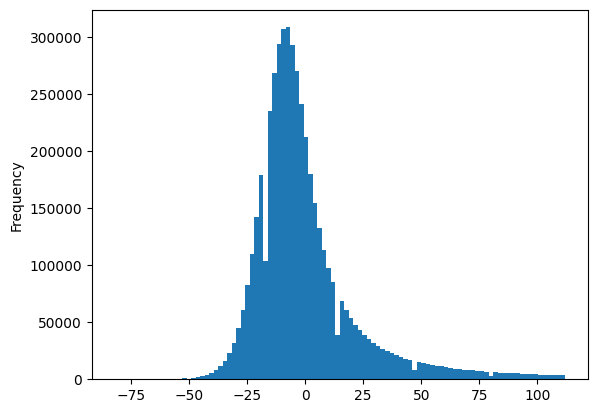

In [4]:
#keep only 3 sigma values of ARRIVAL_DELAY
from matplotlib import pyplot as plt


df = df[(df['ARRIVAL_DELAY'] < 3*df['ARRIVAL_DELAY'].std()) & (df['ARRIVAL_DELAY'] > -3*df['ARRIVAL_DELAY'].std())]
#then plot the distribution, save png
df['ARRIVAL_DELAY'].plot(kind='hist', bins=100)
plt.savefig('arrival_delay_hist.png')

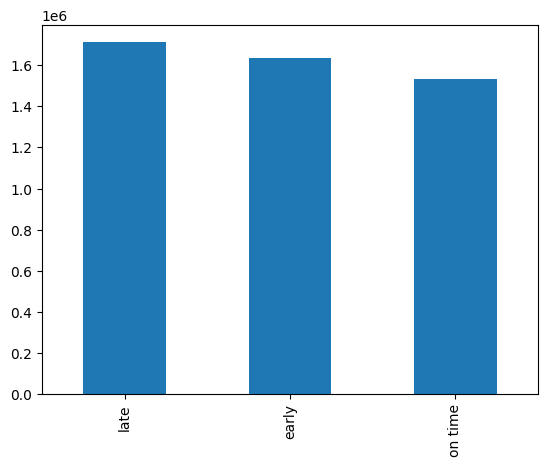

In [6]:
#split into 3 categories; early, on time, late
#make on time a +/- 10 min window
df['DELAY_CAT'] = df['ARRIVAL_DELAY'].apply(lambda x: 'early' if x < -10 else ('late' if x > 0 else 'on time'))

#then plot the distribution, save png
df['DELAY_CAT'].value_counts().plot(kind='bar')
plt.savefig('arrival_delay_bar.png')

In [7]:
#columns
df.columns

Index(['DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'day_of_year',
       'time_of_day', 'day_ind', 'temp', 'wx_icon', 'icon_extd', 'dewPt',
       'heat_index', 'rh', 'pressure', 'vis', 'wc', 'wdir', 'wdir_cardinal',
       'wspd', 'precip_hrly', 'uv_desc', 'feels_like', 'uv_index',
       'wx_phrase_simple', 'time_of_day_dest', 'day_ind_dest', 'temp_dest',
       'wx_icon_dest', 'icon_extd_dest', 'dewPt_dest', 'heat_index_dest',
       'rh_dest', 'pressure_dest', 'vis_dest', 'wc_dest', 'wdir_dest',
       'wspd_dest', 'precip_hrly_dest', 'uv_desc_dest', 'feels_like_dest',
       'uv_index_dest', 'wx_phrase_simple_dest', 'DELAY_CAT'],
      dtype='object')

In [8]:
#describe
df.describe()

,DAY,DAY_OF_WEEK,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,...,dewPt_dest,heat_index_dest,rh_dest,pressure_dest,vis_dest,wc_dest,wspd_dest,precip_hrly_dest,feels_like_dest,uv_index_dest
count,4.878915e+06,4.878915e+06,4.878915e+06,4.878915e+06,4.878915e+06,4.878915e+06,4.878915e+06,4.878915e+06,4.878915e+06,4.878915e+06,...,4.878915e+06,4.878915e+06,4.878915e+06,4.878915e+06,4.878915e+06,4.878915e+06,4.878915e+06,4.878915e+06,4.878915e+06,4.878915e+06
mean,1.572532e+01,3.928050e+00,4.967755e+00,1.594390e+01,1.326399e+03,1.392928e+02,1.343394e+02,1.109945e+02,7.985996e+02,1.505871e+03,...,4.749082e+01,6.316080e+01,6.296377e+01,2.914878e+01,9.238508e+00,6.099978e+01,8.496499e+00,2.174953e-03,6.170737e+01,2.027730e+00
std,8.745535e+00,1.991235e+00,1.946003e+01,8.508298e+00,4.713746e+02,7.287974e+01,7.173421e+01,6.976157e+01,5.780637e+02,4.707486e+02,...,1.893355e+01,2.025856e+01,2.181578e+01,1.348962e+00,2.112023e+00,2.190926e+01,5.440693e+00,1.976376e-02,2.275139e+01,2.246221e+00
min,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,1.800000e+01,1.400000e+01,7.000000e+00,3.100000e+01,2.000000e+00,...,-3.800000e+01,-3.200000e+01,1.000000e+00,1.874000e+01,0.000000e+00,-6.600000e+01,0.000000e+00,0.000000e+00,-6.600000e+01,0.000000e+00
25%,8.000000e+00,2.000000e+00,-5.000000e+00,1.100000e+01,9.260000e+02,8.500000e+01,8.200000e+01,6.000000e+01,3.710000e+02,1.116000e+03,...,3.400000e+01,5.000000e+01,4.700000e+01,2.904000e+01,1.000000e+01,5.000000e+01,5.000000e+00,0.000000e+00,5.000000e+01,0.000000e+00
50%,1.600000e+01,4.000000e+00,-2.000000e+00,1.400000e+01,1.320000e+03,1.210000e+02,1.170000e+02,9.300000e+01,6.410000e+02,1.520000e+03,...,5.100000e+01,6.500000e+01,6.500000e+01,2.952000e+01,1.000000e+01,6.500000e+01,8.000000e+00,0.000000e+00,6.500000e+01,1.000000e+00
75%,2.300000e+01,6.000000e+00,6.000000e+00,1.900000e+01,1.726000e+03,1.700000e+02,1.650000e+02,1.410000e+02,1.035000e+03,1.912000e+03,...,6.300000e+01,7.800000e+01,8.100000e+01,2.993000e+01,1.000000e+01,7.700000e+01,1.200000e+01,0.000000e+00,7.800000e+01,3.000000e+00
max,3.100000e+01,7.000000e+00,1.660000e+02,1.640000e+02,2.359000e+03,7.180000e+02,7.660000e+02,6.900000e+02,4.983000e+03,2.400000e+03,...,1.670000e+02,2.210000e+02,1.000000e+02,3.805000e+01,3.200000e+01,1.920000e+02,1.750000e+02,2.810000e+00,2.210000e+02,1.500000e+01


In [11]:
vals  = {}
for col in df.columns:
    #if object
    if df[col].dtype == 'object':
        vals[col] = df[col].unique()
    else:
        vals[col] = [df[col].min(), df[col].max()]
    
for key, value in vals.items():
    print(key, value)

#for each column, print the type
for col in df.columns:
    print(col, df[col].dtype)

DAY [1, 31]
DAY_OF_WEEK [1, 7]
AIRLINE ['DL' 'AA' 'US' 'AS' 'UA' 'NK' 'F9' 'HA' 'B6' 'OO' 'EV' 'MQ' 'WN' 'VX']
ORIGIN_AIRPORT ['LAX' 'LAS' 'PHX' 'SLC' 'SEA' 'DEN' 'ANC' 'PDX' 'FAI' 'SJU' 'PBG' 'IAG'
 'PSE' 'BQN' 'BOS' 'ORD' 'DFW' 'EWR' 'FLL' 'GEG' 'FAR' 'BIS' 'HNL' 'ONT'
 'BOI' 'FSD' 'MKE' 'MSP' 'MCO' 'RDU' 'BTR' 'HIB' 'ABR' 'IAH' 'ORF' 'PIT'
 'BWI' 'TPA' 'MFE' 'BRO' 'VPS' 'LWS' 'BJI' 'GCC' 'AUS' 'BNA' 'MSO' 'SGF'
 'PHL' 'RIC' 'JAX' 'BHM' 'SHV' 'DSM' 'DIK' 'SAT' 'RDD' 'EUG' 'SFO' 'ROC'
 'IAD' 'ALB' 'GRR' 'BUF' 'PWM' 'JFK' 'CRP' 'DHN' 'FAT' 'SMF' 'DCA' 'OMA'
 'MCI' 'HSV' 'ATL' 'MSN' 'MFR' 'IDA' 'LGA' 'MDW' 'PVD' 'RNO' 'PBI' 'SYR'
 'FNT' 'CHS' 'SAV' 'BTV' 'SBA' 'CLE' 'IND' 'CMH' 'HOU' 'MSY' 'GSP' 'ICT'
 'TUL' 'BDL' 'GRB' 'BFL' 'RDM' 'CID' 'CAK' 'MHT' 'TYR' 'LAN' 'DTW' 'XNA'
 'GSO' 'EKO' 'STL' 'RSW' 'OAK' 'MEM' 'ABQ' 'CLT' 'DAL' 'ELP' 'LBB' 'MIA'
 'LIT' 'OKC' 'SIT' 'SDF' 'SRQ' 'ECP' 'ATW' 'BZN' 'PNS' 'BIL' 'CVG' 'AVP'
 'MOB' 'TYS' 'ABE' 'JAN' 'AEX' 'EVV' 'OAJ' 'BMI' 'MLI' 'ELM' 'ERI' 'CRW

In [1]:
#save to csv
df.to_csv('../datasets/df_flight_weather_4.csv')

NameError: name 'df' is not defined

In [3]:
import pandas as pd 
df = pd.read_csv('../datasets/df_flight_weather_4.csv', index_col=0)

In [4]:
#count unique values for day_of_year
df['day_of_year'].nunique()
#what days are missing?
df['day_of_year'].value_counts().sort_index()


333

NameError: name 'plt' is not defined

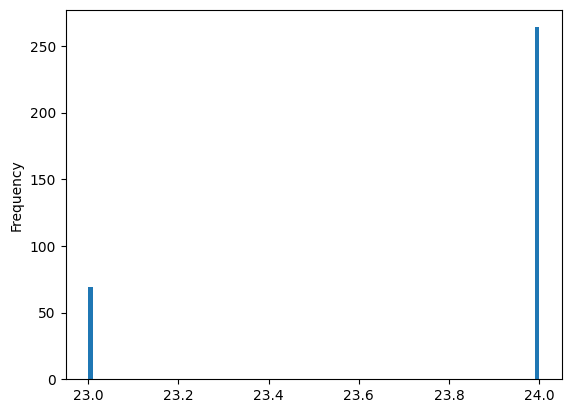

In [6]:
#for each day_of_year, count time_of_day that doesnt have 24 unique values
#then plot the distribution, save png
df.groupby('day_of_year')['time_of_day'].nunique().plot(kind='hist', bins=100)
plt.show()